In [1]:
!pip install autograd

In [2]:
import autograd.numpy as np  # Thinly-wrapped numpy
from autograd import grad  

In [28]:
def f(x,y):                 # Define a function
    return x*x*y

grad_tanh = grad(f,1)       # Obtain its gradient function
grad_tanh(1.0,13.0)               # Evaluate the gradient at x = 1.0

1.0

In [97]:
#linear regression problems

In [281]:
#generate data
x1 = np.random.normal(0,1,1000)
x2 = np.random.uniform(0,1,1000)
x3 = np.random.gamma(2,12,1000)

X = np.array([x1,x2,x3]).T

alpha = np.random.uniform()
beta = np.random.uniform(0,1,3)

Y = np.matmul(X,beta) + alpha

print(alpha)
print(beta)

Y_train = Y + np.random.random(Y.shape)

0.06724321540873557
[0.22256461 0.7700448  0.41005706]


In [282]:
def loss(beta):
    diff = np.matmul(X, beta)-Y_train
    return (1/N)*np.dot(diff,diff)

dloss = grad(loss)

In [283]:
N,p = X.shape
alpha = np.random.random()
beta = np.random.random(p)
beta = np.insert(beta, 0,alpha)

X = np.insert(X, 0, values=1, axis=1)


lr = 0.001

for i in range(0,50000):
    beta -= lr*dloss(beta)
    if i%20000==0:
        print(loss(beta))

1.5078402506645503
0.08366000157992416
0.08349824842679095


In [284]:
beta

array([0.56891371, 0.20952098, 0.80636606, 0.40987667])

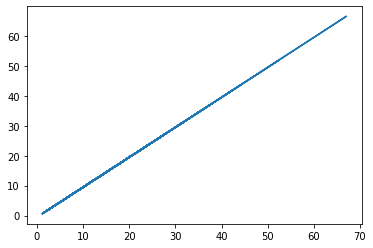

In [287]:
import matplotlib.pyplot as plt
plt.plot(np.matmul(X, beta),Y)

In [131]:
import autograd.numpy as np
from autograd import grad

def sigmoid(x):
    return 0.5 * (np.tanh(x / 2.) + 1)

def logistic_predictions(weights, inputs):
    # Outputs probability of a label being true according to logistic model.
    return sigmoid(np.dot(inputs, weights))

def training_loss(weights):
    # Training loss is the negative log-likelihood of the training labels.
    preds = logistic_predictions(weights, inputs)
    label_probabilities = preds * targets + (1 - preds) * (1 - targets)
    return -np.sum(np.log(label_probabilities))

# Build a toy dataset.
inputs = np.array([[0.52, 1.12,  0.77],
                   [0.88, -1.08, 0.15],
                   [0.52, 0.06, -1.30],
                   [0.74, -2.49, 1.39]])
targets = np.array([True, True, False, True])

# Define a function that returns gradients of training loss using Autograd.
training_gradient_fun = grad(training_loss)

# Optimize weights using gradient descent.
weights = np.array([0.0, 0.0, 0.0])
print("Initial loss:", training_loss(weights))
for i in range(100):
    weights -= training_gradient_fun(weights) * 0.01

print("Trained loss:", training_loss(weights))

Initial loss: 2.772588722239781
Trained loss: 1.0672706757870163
